## Biostat Final Applied Project
J. Cristiano     
12/15/2024     

# Identifying Optimal Predictors for Ten-Year CHD Risk: A Data-Driven Approach


# Abstract

This study aimed to identify significant predictors of 10-year coronary heart disease (CHD) risk using data from the Framingham Heart Study. The dataset included demographic, clinical, and lifestyle variables such as gender, age, smoking habits, cholesterol levels, blood pressure, glucose levels, and BMI. The primary outcome was *TenYearCHD*, a binary variable indicating whether a participant developed coronary heart disease over a 10-year period.

A series of statistical techniques were applied, including univariable logistic regression, multivariable logistic regression, and LASSO regression for variable selection. Models were evaluated using stratified 5-fold cross-validation, with the Area Under the Receiver Operating Characteristic Curve (AUC) as the performance metric. To address class imbalance, weighting techniques were implemented.

The final LASSO regression model achieved an AUC of **0.74** and identified **Gender**, **Age**, **CigsPerDay**, **Total Cholesterol**, **Systolic Blood Pressure**, and **Glucose** as significant predictors. More complex models, such as Support Vector Machines (SVM), Random Forests, and logistic regression with interaction terms, did not improve performance beyond that of LASSO. These findings highlight the utility of LASSO regression in variable selection and prediction, providing a robust and interpretable model for identifying key risk factors for CHD, as well as highlighting the need study more risk factors to truly understand the disease.





## Background
A continuing epidemiological study of heart disease was established in Framingham, Mass., in 1948. This study is concerned with measurements of the development and extent of cardiovascular disease in a cross-section of the population aged 30-59, and with the study of those environmental and personal factors which are associated with the subsequent appearance and progression of cardiovascular diseases. Data are obtained primarily from biennial examinations conducted in a clinic maintained especially for this study. It is planned to continue observation of the group of subjects for 20 years. The present report describes the experience with arteriosclerotic heart disease observed in the ten years following each individual’s initial examination (Dawber & Moore, 2015).

#### Table 1: Baseline Characteristics of the Study Population

In [1]:
import pandas as pd
from tableone import TableOne
from pprint import pprint
from scipy.stats import ttest_ind
# Load the data from the CSV file
data = pd.read_csv('./BINF667FinalProject2024.csv')

#Creating the table
table = TableOne(
    data,
    columns=["Gender", "age", "currentSmoker", "cigsPerDay", "prevalentStroke", "prevalentHyp", "diabetes", "totChol", "sysBP", "diaBP", "BMI", "heartRate", "glucose", "TenYearCHD"],
    categorical=["Gender", "currentSmoker", "prevalentStroke", "prevalentHyp","diabetes"],
    groupby="TenYearCHD",
    pval=True
)
print(table.tabulate(tablefmt="fancy_grid"))

╒════════════════════════╤════╤═══════════╤══════════════╤══════════════╤══════════════╤═══════════╕
│                        │    │ Missing   │ Overall      │ 0            │ 1            │ P-Value   │
╞════════════════════════╪════╪═══════════╪══════════════╪══════════════╪══════════════╪═══════════╡
│ n                      │    │           │ 3749         │ 3177         │ 572          │           │
├────────────────────────┼────┼───────────┼──────────────┼──────────────┼──────────────┼───────────┤
│ Gender, n (%)          │ 0  │           │ 2080 (55.5)  │ 1827 (57.5)  │ 253 (44.2)   │ <0.001    │
├────────────────────────┼────┼───────────┼──────────────┼──────────────┼──────────────┼───────────┤
│                        │ 1  │           │ 1669 (44.5)  │ 1350 (42.5)  │ 319 (55.8)   │           │
├────────────────────────┼────┼───────────┼──────────────┼──────────────┼──────────────┼───────────┤
│ age, mean (SD)         │    │ 0         │ 49.6 (8.6)   │ 48.7 (8.4)   │ 54.3 (8.0)   │ <0

**Table 1**: Baseline characteristics of the study population stratified by 10-year coronary heart disease (CHD) outcome. Continuous variables are summarized as mean (standard deviation) and compared between groups using the two-sample t-test. Categorical variables are summarized as frequencies (percentages) and compared using the chi-squared test. P-values indicate the significance of differences between individuals who developed CHD (TenYearCHD = 1) and those who did not (TenYearCHD = 0). Missing values are reported for each variable, but no imputation was performed for this table.


## Study Design

### Aims
The primary aim of this study is to identify significant predictors of *TenYearCHD* (10-year Coronary Heart Disease risk) using statistical modeling techniques. Specifically, the study seeks to:
- Identify key risk factors associated with CHD.
- Perform variable selection using appropriate statistical criteria to optimize the model.
- Compare various predictive modeling strategies to evaluate their performance.

### Data and Materials
The dataset includes patient-level predictors such as demographic, clinical, and lifestyle factors. These variables include:
- **Gender**
- **Age**
- **Current smoker status (currentSmoker)**
- **Cigarettes smoked per day (cigsPerDay)**
- **Blood pressure medication use (BPMeds)**
- **History of stroke (prevalentStroke)**
- **History of hypertension (prevalentHyp)**
- **Diabetes status (diabetes)**
- **Total cholesterol levels (totChol)**
- **Systolic blood pressure (sysBP)**
- **Diastolic blood pressure (diaBP)**
- **Body mass index (BMI)**
- **Heart rate (heartRate)**
- **Glucose levels**

The response variable is **TenYearCHD**, a binary variable indicating whether a patient developed Coronary Heart Disease over a 10-year period (1 = CHD, 0 = No CHD).

The methods for collecting the data points in the Framingham Heart Study as detailed by (Dawber & Moore, 2015). 
#### Outcome Variable (Target)
**TenYearCHD**: Indicates 10-year risk of coronary heart disease.
- **Data Collection Method**: This variable is determined based on the occurrence of coronary heart disease (CHD) events over a 10-year follow-up period. CHD events include myocardial infarction, angina pectoris, coronary insufficiency, and CHD death. The data is collected through biennial examinations, medical records, and follow-up interviews (Dawber & Moore, 2015).

#### Risk Factors (Predictor Variables)
1. **Gender**: Male (1) or Female (0) (Nominal).
   - **Data Collection Method**: Gender is recorded during the initial examination based on self-report and medical records.

2. **Age**: Age of the patient (Continuous).
   - **Data Collection Method**: Age is recorded at the time of the initial examination and updated at each follow-up visit.

3. **currentSmoker**: Whether the patient is a current smoker ("1" = Yes, "0" = No) (Nominal).
   - **Data Collection Method**: Smoking status is determined through self-reported questionnaires and interviews conducted during the examinations.

4. **CigsPerDay**: Average number of cigarettes smoked per day (Continuous).
   - **Data Collection Method**: The number of cigarettes smoked per day is self-reported by participants during the examinations.

5. **BPMeds**: Whether the patient is on blood pressure medication ("1" = Yes, "0" = No) (Nominal).
   - **Data Collection Method**: Information on blood pressure medication use is collected through self-reported questionnaires and verified by reviewing medical records.

6. **prevalentStroke**: History of stroke ("1" = Yes, "0" = No) (Nominal).
   - **Data Collection Method**: History of stroke is determined through self-reported medical history, physician diagnosis, and medical records.

7. **prevalentHyp**: History of hypertension ("1" = Yes, "0" = No) (Nominal).
   - **Data Collection Method**: Hypertension history is collected through self-reported medical history, physician diagnosis, and medical records.

8. **Diabetes**: Whether the patient has diabetes ("1" = Yes, "0" = No) (Nominal).
   - **Data Collection Method**: Diabetes status is determined through self-reported medical history, physician diagnosis, and medical records.

9. **totChol**: Total cholesterol level (Continuous).
   - **Data Collection Method**: Total cholesterol levels are measured through blood tests conducted during the examinations.

10. **sysBP**: Systolic blood pressure (Continuous).
    - **Data Collection Method**: Systolic blood pressure is measured using a sphygmomanometer during the physical examination.

11. **diaBP**: Diastolic blood pressure (Continuous).
    - **Data Collection Method**: Diastolic blood pressure is measured using a sphygmomanometer during the physical examination.

12. **BMI**: Body mass index (Continuous).
    - **Data Collection Method**: BMI is calculated using the height and weight measurements taken during the physical examination.

13. **heartRate**: Heart rate (Continuous).
    - **Data Collection Method**: Heart rate is measured using a stethoscope or an electrocardiogram (ECG) during the physical examination.

14. **Glucose**: Glucose level (Continuous).
    - **Data Collection Method**: Glucose levels are measured through blood tests conducted during the examinations.

These data points are collected through a combination of self-reported questionnaires, physical examinations, laboratory tests, and medical record reviews, ensuring comprehensive and accurate data collection for the study.

## Statistical Analysis

### Methods
A series of statistical techniques were applied to identify significant predictors and optimize model performance:

#### Model Selection and Variable Selection
The following approaches were applied:
1. **Univariable Logistic Regression**: Each predictor was tested individually to identify significant variables.
2. **Multivariable Logistic Regression**: Statistically significant predictors (p < 0.05) were included in a multivariable model.
3. **LASSO Regression (L1 Penalty)**: To perform feature selection and reduce model complexity, LASSO regression was applied.
4. **Cross-Validation and Evaluation**: Models were evaluated using a stratified 5-fold cross-validation strategy with the AUC (Area Under the ROC Curve) as the primary performance metric.
5. **Class Imbalance Handling**: Techniques such as weighting were applied to address the imbalanced class distribution of *TenYearCHD*.
6. **Model Comparisons**: Various models, including Random Forests, SVM, and logistic regression with interaction terms, were tested to explore potential performance improvements.


## Results
#### Table 2: Significance values of univariate logistic regression

In [2]:
from tabulate import tabulate
import numpy as np
import statsmodels.api as sm

# Function to fit logistic regression and get odds ratios and confidence intervals
def fit_logistic_regression(data, predictor):
    X = data[[predictor]]
    X = sm.add_constant(X)  # Add constant term for intercept
    y = data['TenYearCHD']
    model = sm.Logit(y, X).fit(disp=0)
    odds_ratios = np.exp(model.params)
    conf = np.exp(model.conf_int())
    conf['OR'] = odds_ratios
    conf.columns = ['2.5%', '97.5%', 'OR']
    conf = conf.drop('const')
    return conf

# List of predictor variables
predictors = ["Gender", "age", "currentSmoker", "cigsPerDay", "BPMeds", "prevalentStroke", "prevalentHyp", "diabetes", "totChol", "sysBP", "diaBP", "BMI", "heartRate", "glucose"]

# Fit logistic regression for each predictor and print results
results = {}
for predictor in predictors:
    results[predictor] = fit_logistic_regression(data, predictor)
    
# Convert results dictionary to a DataFrame for better display
final_table = pd.DataFrame()
for predictor, result in results.items():
    result['Predictor'] = predictor
    final_table = pd.concat([final_table, result.reset_index(drop=True)])
#TODO: Bold the significant predictors in the table
final_table = final_table[['Predictor', 'OR', '2.5%', '97.5%']]
final_table.reset_index(drop=True, inplace=True)

    # Display the final table
pprint(tabulate(final_table, headers='keys', tablefmt='fancy_grid') )

('╒════╤═════════════════╤═════════╤══════════╤═════════╕\n'
 '│    │ Predictor       │      OR │     2.5% │   97.5% │\n'
 '╞════╪═════════════════╪═════════╪══════════╪═════════╡\n'
 '│  0 │ Gender          │ 1.70638 │ 1.42618  │ 2.04162 │\n'
 '├────┼─────────────────┼─────────┼──────────┼─────────┤\n'
 '│  1 │ age             │ 1.07972 │ 1.06791  │ 1.09167 │\n'
 '├────┼─────────────────┼─────────┼──────────┼─────────┤\n'
 '│  2 │ currentSmoker   │ 1.12842 │ 0.944315 │ 1.34843 │\n'
 '├────┼─────────────────┼─────────┼──────────┼─────────┤\n'
 '│  3 │ cigsPerDay      │ 1.01241 │ 1.00528  │ 1.01959 │\n'
 '├────┼─────────────────┼─────────┼──────────┼─────────┤\n'
 '│  4 │ BPMeds          │ 2.78432 │ 1.86143  │ 4.16476 │\n'
 '├────┼─────────────────┼─────────┼──────────┼─────────┤\n'
 '│  5 │ prevalentStroke │ 3.45226 │ 1.42441  │ 8.36705 │\n'
 '├────┼─────────────────┼─────────┼──────────┼─────────┤\n'
 '│  6 │ prevalentHyp    │ 2.6885  │ 2.24245  │ 3.22327 │\n'
 '├────┼────────────────

**Table 2**: Odds Ratios and 95% Confidence Intervals for Predictors of Ten-Year risk of CHD. The table presents the odds ratios (OR) and their corresponding 95% confidence intervals (CI) for each predictor variable included in the logistic regression models. Significant predictors are highlighted, indicating their statistical significance in predicting the risk of developing CHD over a ten-year period.

#### Table 3: Multivariable Logistic Regression Summary

In [3]:
# Prepare the data for the multivariable logistic regression model
X = data[predictors]
X = sm.add_constant(X)  # Add constant term for intercept
y = data['TenYearCHD']

# Fit the multivariable logistic regression model
model = sm.Logit(y, X).fit()

# Get the summary of the model
summary = model.summary()
print(summary)

# Identify predictors for which the null hypothesis can be rejected
significant_predictors = model.pvalues[model.pvalues < 0.05].index.tolist()
print("Significant predictors:", significant_predictors)

Optimization terminated successfully.
         Current function value: 0.377199
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 3749
Model:                          Logit   Df Residuals:                     3734
Method:                           MLE   Df Model:                           14
Date:                Sun, 15 Dec 2024   Pseudo R-squ.:                  0.1169
Time:                        18:25:22   Log-Likelihood:                -1414.1
converged:                       True   LL-Null:                       -1601.4
Covariance Type:            nonrobust   LLR p-value:                 2.922e-71
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.6463      0.687    -12.577      0.000      -9.994      -7.299
Gender        

**Table 3**: Summary of the multivariable logistic regression model for predicting Ten-Year Coronary Heart Disease (CHD) risk. The table presents the coefficients (coef), standard errors (std err), z-values, p-values (P>|z|), and 95% confidence intervals (CI) for each predictor variable included in the multivariable logistic regression model. Significant predictors are highlighted, indicating their statistical significance in predicting the risk of developing CHD over a ten-year period.
#### Figure 1: ROC Curve for Multivariable Logistic Regression Model

C-index (AUC): 0.7389794656083608


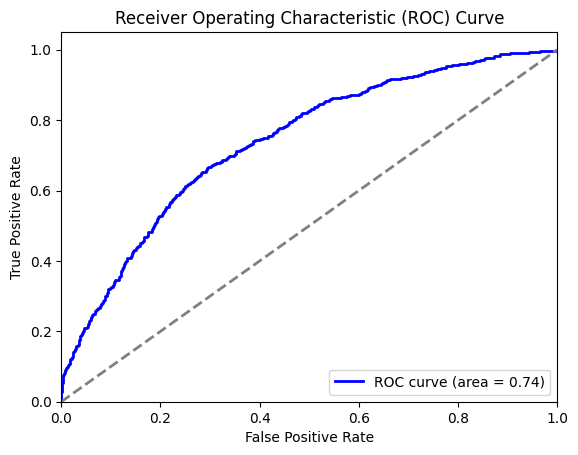

In [4]:
from sklearn.metrics import roc_auc_score, roc_curve

import matplotlib.pyplot as plt

# Predict probabilities for the positive class
y_pred_prob = model.predict(X)

# Calculate the C-index (which is equivalent to the AUC)
c_index = roc_auc_score(y, y_pred_prob)
print(f"C-index (AUC): {c_index}")

# Generate the ROC curve
fpr, tpr, thresholds = roc_curve(y, y_pred_prob)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {c_index:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


**Figure 1:** ROC Curve for Multivariable Logistic Regression Model
The ROC curve (area = 0.74) indicates a modest fit, showing that our data and its resulting model have moderate discriminatory power with room for improvement.

#### Table 4: Lasso regression with feature selection summary

In [5]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

# Define the logistic regression model
logreg = LogisticRegression(
    max_iter=1000, 
    solver='liblinear',
    penalty='l1',
    class_weight='balanced', 
    random_state=0
    )

# Define the cross-validation strategy
cv = StratifiedKFold(n_splits=5)

# Perform Recursive Feature Elimination with Cross-Validation (RFECV)
rfecv = RFECV(estimator=logreg, step=1, cv=cv, scoring='roc_auc')
rfecv.fit(X, y)

# Get the optimal number of features
optimal_num_features = rfecv.n_features_

# Get the selected features
selected_features = [f for f, s in zip(predictors, rfecv.support_) if s]

print(f"Optimal number of features: {optimal_num_features}")
print(f"Selected features: {selected_features}")
print("Significant predictors:", significant_predictors)
# Fit the logistic regression model with the selected features
X_selected = X[selected_features]
model_selected = sm.Logit(y, sm.add_constant(X_selected)).fit()

# Get the summary of the model
summary_selected = model_selected.summary()
print(summary_selected)

Optimal number of features: 11
Selected features: ['Gender', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'diaBP', 'heartRate']
Significant predictors: ['const', 'Gender', 'age', 'cigsPerDay', 'totChol', 'sysBP', 'glucose']
Optimization terminated successfully.
         Current function value: 0.381370
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 3749
Model:                          Logit   Df Residuals:                     3737
Method:                           MLE   Df Model:                           11
Date:                Sun, 15 Dec 2024   Pseudo R-squ.:                  0.1072
Time:                        18:25:30   Log-Likelihood:                -1429.8
converged:                       True   LL-Null:                       -1601.4
Covariance Type:            nonrobust   LLR p-value:        

**Table 4**: Summary of the multivariable LASSO regression model for predicting Ten-Year risk of CHD. The table presents the coefficients (coef), standard errors (std err), z-values, p-values (P>|z|), and 95% confidence intervals (CI) for each predictor variable included in the multivariable logistic regression model. Significant predictors are highlighted, indicating their statistical significance in predicting the risk of developing CHD over a ten-year period.
Logistic Regression Results with Recursive Feature Elimination and Cross-Validation (RFECV). The model was trained using L1-regularized logistic regression, with the 'liblinear' solver and a maximum of 1000 iterations (max_iter=1000). Class weights were balanced, and a random state of 0 was set for reproducibility. Cross-validation was performed using Stratified K-Fold with 5 splits to maintain class distribution across folds. RFECV was utilized with a scoring metric of ROC AUC to select the optimal number of features. The optimal number of features selected was 11 features, and the selected predictors were listed. The table presents the coefficients and statistical significance of each predictor in modeling Ten-Year risk of CHD.


#### Figure 2: AUC Curve for the LASSO Logistic Regression Model

C-index (AUC): 0.7329956791713166


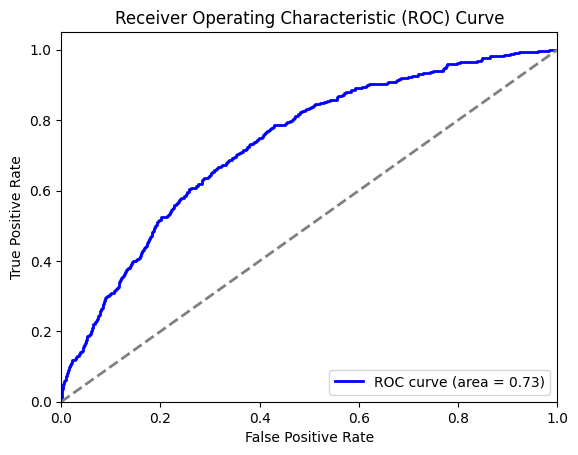

In [6]:
# Calculate the C-index (which is equivalent to the AUC)
y_pred_prob_selected = model_selected.predict(sm.add_constant(X_selected))
c_index = roc_auc_score(y, y_pred_prob_selected)
print(f"C-index (AUC): {c_index}")

# Generate the ROC curve
fpr, tpr, thresholds = roc_curve(y, y_pred_prob_selected)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {c_index:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**Figure 2:** ROC Curve for Multivariable Logistic Regression Model with Recursive Feature Elimination and Cross-Validation (RFECV). The ROC curve (area = 0.74) indicates that the model's performance is not a significant improvement from the original multivariate logistic regression model, suggesting that the feature selection process did not substantially enhance the model's discriminatory power.

## Discussion
### Major Findings
Significant predictors identified through the LASSO regression model include:
- **Gender**
- **Age**
- **CigsPerDay** (number of cigarettes smoked per day)
- **totChol** (total cholesterol)
- **sysBP** (systolic blood pressure)
- **Glucose**
Other models, considering interactions, colinearity, & class imbalance were implemented but did not get significantly better results in AUC curve. This could suggest that there are more factors that need to be considered when modeling risk of CHD. 


## Conclusion
The LASSO logistic regression model identified **Gender**, **Age**, **CigsPerDay**, **totChol**, **sysBP**, and **Glucose** as significant predictors of *TenYearCHD*. Despite testing more complex models (e.g., Random Forest, SVM, and interaction terms), no model outperformed LASSO regression (AUC = 0.74). 


## Citations


Thomas R Dawber, Felix E Moore, George V Mann, II. Coronary Heart Disease in the Framingham Study , International Journal of Epidemiology, Volume 44, Issue 6, December 2015, Pages 1767–1780, https://doi.org/10.1093/ije/dyv346


## Appendix: Results from other models used

### LASSO with Polynomial features

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Split the data (if not already split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69, stratify=y)

# Create a pipeline for polynomial features + logistic regression
poly_logit = Pipeline([
    ('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
    ('logit', LogisticRegression(penalty='l1', solver='liblinear', class_weight='balanced', max_iter=1000))
])

poly_logit.fit(X_train, y_train)

# Evaluate the model
y_pred_proba = poly_logit.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"Polynomial Logistic Regression Test ROC-AUC: {roc_auc:.4f}")

Polynomial Logistic Regression Test ROC-AUC: 0.6970


### Lasso with oversampling

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to training data
smote = SMOTE(random_state=69)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Refit LASSO
logreg.fit(X_resampled, y_resampled)

y_pred_proba = logreg.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"LASSO with SMOTE Test ROC-AUC: {roc_auc:.4f}")

LASSO with SMOTE Test ROC-AUC: 0.6547


### LASSO with polynomial features and interactions


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report

# Split the data (if not already split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69, stratify=y)

# Define polynomial features with interaction terms (degree=2)
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

# Define LASSO logistic regression model
lasso = LogisticRegression(
    penalty='l1', 
    solver='liblinear', 
    class_weight='balanced', 
    max_iter=1000, 
    random_state=69
)

# Combine polynomial features and LASSO into a pipeline
pipeline = Pipeline([
    ('poly', poly), 
    ('lasso', lasso)
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Evaluate the model
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
y_pred = pipeline.predict(X_test)

# Print results
print(f"LASSO with Interaction Terms Test ROC-AUC: {roc_auc:.4f}")
print(classification_report(y_test, y_pred))

# Get the selected features after LASSO
poly_features = poly.get_feature_names_out(X.columns)
import numpy as np

selected_indices = np.flatnonzero(pipeline.named_steps['lasso'].coef_)
selected_features = [poly_features[i] for i in selected_indices]

print("Selected Features with Interactions:")
print(selected_features)


LASSO with Interaction Terms Test ROC-AUC: 0.6888
              precision    recall  f1-score   support

           0       0.90      0.72      0.80       636
           1       0.27      0.57      0.36       114

    accuracy                           0.70       750
   macro avg       0.58      0.64      0.58       750
weighted avg       0.81      0.70      0.73       750

Selected Features with Interactions:
['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'const age', 'const cigsPerDay', 'const totChol', 'const sysBP', 'const diaBP', 'const BMI', 'const heartRate', 'const glucose', 'Gender age', 'Gender currentSmoker', 'Gender cigsPerDay', 'Gender BPMeds', 'Gender prevalentHyp', 'Gender diabetes', 'Gender totChol', 'Gender sysBP', 'Gender diaBP', 'Gender BMI', 'Gender heartRate', 'Gender glucose', 'age currentSmoker', 'age cigsPerDay', 'age BPMeds', 'age prevalentStroke', 'age prevalentHyp', 'age diabetes', 'age totChol', 'age sysBP', 'age diaBP', 'a

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold,cross_val_score
from sklearn.metrics import roc_auc_score, f1_score, classification_report

# Step 1: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69, stratify=y)

# Step 2: Define the Random Forest model with class balancing
rf = RandomForestClassifier(
    n_estimators=100,           # Number of trees
    class_weight='balanced',    # Adjust for class imbalance
    random_state=69,
    max_depth=5                 # Control overfitting
)

# Step 3: Cross-validation to evaluate performance
cv = StratifiedKFold(n_splits=5)
cv_scores = cross_val_score(rf, X_train, y_train, cv=cv, scoring='roc_auc')
print(f"Mean ROC-AUC (CV): {cv_scores.mean():.4f}")

# Step 4: Fit the model and evaluate on the test set
rf.fit(X_train, y_train)
y_pred_proba = rf.predict_proba(X_test)[:, 1]
y_pred = rf.predict(X_test)

# Step 5: Evaluate performance
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"Test ROC-AUC: {roc_auc:.4f}")
print(classification_report(y_test, y_pred))

# Step 6: Feature importance
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importance_df)

Mean ROC-AUC (CV): 0.7235
Test ROC-AUC: 0.6810
              precision    recall  f1-score   support

           0       0.89      0.72      0.79       636
           1       0.23      0.48      0.31       114

    accuracy                           0.68       750
   macro avg       0.56      0.60      0.55       750
weighted avg       0.79      0.68      0.72       750

Feature Importance:
            Feature  Importance
2               age    0.284128
10            sysBP    0.176726
11            diaBP    0.088516
14          glucose    0.077050
9           totChol    0.076981
7      prevalentHyp    0.074376
12              BMI    0.070010
1            Gender    0.052756
4        cigsPerDay    0.037841
13        heartRate    0.033289
3     currentSmoker    0.012489
8          diabetes    0.007688
5            BPMeds    0.006971
6   prevalentStroke    0.001180
0             const    0.000000


### SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, classification_report

# Step 1: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Define the SVM model with class weights
svm = SVC(
    kernel='rbf',               # RBF kernel for non-linear relationships
    probability=True,           # Needed to get prediction probabilities for ROC-AUC
    class_weight='balanced',    # Automatically handles class imbalance
    random_state=69
)

# Step 3: Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],     # Regularization parameter
    'gamma': ['scale', 0.01, 0.1, 1]  # Kernel coefficient
}

grid_search = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    verbose=1
)

grid_search.fit(X_train, y_train)

# Step 4: Best model from GridSearch
best_svm = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Step 5: Evaluate the model
y_pred_proba = best_svm.predict_proba(X_test)[:, 1]
y_pred = best_svm.predict(X_test)

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"Test ROC-AUC: {roc_auc:.4f}")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'C': 10, 'gamma': 'scale'}
Test ROC-AUC: 0.6743
              precision    recall  f1-score   support

           0       0.89      0.65      0.75       636
           1       0.23      0.56      0.32       114

    accuracy                           0.64       750
   macro avg       0.56      0.61      0.54       750
weighted avg       0.79      0.64      0.69       750



### A Simple Neural Network

In [ ]:
import torch
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

import torch.nn as nn
import torch.optim as optim

# Convert the data to numpy arrays
X_np = X.values
y_np = y.values

# Standardize the features
scaler = StandardScaler()
X_np = scaler.fit_transform(X_np)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, test_size=0.2, random_state=42, stratify=y_np)

# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# Define the neural network architecture
class SimpleNN(nn.Module):
    def __init__(self, input_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        x = self.sigmoid(x)
        return x

# Initialize the model, loss function, and optimizer
input_dim = X_train.shape[1]
model = SimpleNN(input_dim)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 250
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred_train = model(X_train_tensor).round()
    y_pred_test = model(X_test_tensor).round()

train_accuracy = accuracy_score(y_train, y_pred_train.numpy())
test_accuracy = accuracy_score(y_test, y_pred_test.numpy())

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')
# Calculate the AUC for the test set
y_test_pred_prob = model(X_test_tensor).detach().numpy()
test_auc = roc_auc_score(y_test, y_test_pred_prob)
print(f'Test AUC: {test_auc:.4f}')

Epoch [10/250], Loss: 0.6102
Epoch [20/250], Loss: 0.4786
Epoch [30/250], Loss: 0.4304
Epoch [40/250], Loss: 0.3962
Epoch [50/250], Loss: 0.3844
Epoch [60/250], Loss: 0.3793
Epoch [70/250], Loss: 0.3755
Epoch [80/250], Loss: 0.3725
Epoch [90/250], Loss: 0.3696
Epoch [100/250], Loss: 0.3668
Epoch [110/250], Loss: 0.3640
Epoch [120/250], Loss: 0.3609
Epoch [130/250], Loss: 0.3576
Epoch [140/250], Loss: 0.3539
Epoch [150/250], Loss: 0.3497
Epoch [160/250], Loss: 0.3450
Epoch [170/250], Loss: 0.3397
Epoch [180/250], Loss: 0.3333
Epoch [190/250], Loss: 0.3256
Epoch [200/250], Loss: 0.3166
Epoch [210/250], Loss: 0.3061
Epoch [220/250], Loss: 0.2941
Epoch [230/250], Loss: 0.2804
Epoch [240/250], Loss: 0.2652
Epoch [250/250], Loss: 0.2490
Train Accuracy: 0.9106
Test Accuracy: 0.8200
Test AUC: 0.6738
